<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/checks/response_quality/completeness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>


<h1 style="text-align: center;">Evaluating Code Hallucinations</h1>


**What is Code Hallucinations?**: Code Hallucination score checks whether the code mentioned in the generated response is grounded to the retrieved context.

For example, if a user asks: "How to install Pandas on Python". The ideal answer to this question is by running the code "pip install pandas". By using code hallucination score we can evaluate whether the response contains some code that is not grounded by this context, for example a case where the response is "import pandas as pd" to the question: "How to install Pandas on Python"

**Data schema**: The data schema required for this evaluation is as follows:

| Column Name | Description                     |
| ----------- | ------------------------------- |
| question    | The question asked by the user |
| response    | The response given by the model |
| context    | Information retrieved to answer the question |


 If you face any difficulties, need some help with using UpTrain or want to brainstorm on custom evaluations for your use-case, [speak to the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

## Step 1: Install UpTrain by running 'pip install uptrain'

In [1]:
#!pip install uptrain

## Step 2: Let's define our dataset to run evaluations upon

In [2]:
good_data = [
    {
        "question": "How can I install the Pandas package in Python?",
        "context": "The Pandas package can easily be installed on Python by using: ```pip install pandas```",
        "response": "To install the Pandas package on Python use : ```pip install pandas```"
    }
]

bad_data = [
    {
        "question": "How can I install the Pandas package in Python?",
        "context": "The Pandas package can easily be installed on Python by using: ```pip install pandas```",
        "response": "To install the Pandas package on Python use : ```import pandas as pd```"
    }
]

data = good_data + bad_data

## Step 3: Running evaluations using UpTrain's Open-Source Software (OSS)

In [3]:
from uptrain import EvalLLM, Evals
import json

OPENAI_API_KEY = "sk-******************"  # Insert your OpenAI key here

eval_llm = EvalLLM(openai_api_key=OPENAI_API_KEY)

res = eval_llm.evaluate(
    data = data,
    checks = [Evals.CODE_HALLUCINATION]
)

/Users/shreyanshjain/anaconda3/lib/python3.11/site-packages/lazy_loader/__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)
2024-02-19 16:26:38.549 | INFO     | uptrain.framework.evalllm:evaluate_on_server:216 - Sending evaluation request for rows 0 to <50 to the Uptrain


In [4]:
print(json.dumps(res, indent=3))

[
   {
      "question": "How can I install the Pandas package in Python?",
      "context": "The Pandas package can easily be installed on Python by using: ```pip install pandas```",
      "response": "To install the Pandas package on Python use : ```pip install pandas```",
      "code_snippet": "pip install pandas",
      "code_overlap_with_context": 1.0,
      "explanation_code_snippet": "['1. The given text starts with a statement providing a task related to installing a package in Python.', '2. The text then presents a specific command written in CLI format: pip install pandas.', '3. The provided content is a CLI command, which can be executed in the terminal to install the Pandas package in Python.', '4. The text does not just mention a function or method but includes an actual CLI command.']",
      "score_code_hallucination": 0.0,
      "explanation_code_hallucination": "The code snippet in the response has a matching score of 1.0 with the given context."
   },
   {
      "ques

## Step 4: Let's look at some of the results 

### Sample without code hallucination

In [5]:
print(json.dumps(res[0],indent=3))

{
   "question": "How can I install the Pandas package in Python?",
   "context": "The Pandas package can easily be installed on Python by using: ```pip install pandas```",
   "response": "To install the Pandas package on Python use : ```pip install pandas```",
   "code_snippet": "pip install pandas",
   "code_overlap_with_context": 1.0,
   "explanation_code_snippet": "['1. The given text starts with a statement providing a task related to installing a package in Python.', '2. The text then presents a specific command written in CLI format: pip install pandas.', '3. The provided content is a CLI command, which can be executed in the terminal to install the Pandas package in Python.', '4. The text does not just mention a function or method but includes an actual CLI command.']",
   "score_code_hallucination": 0.0,
   "explanation_code_hallucination": "The code snippet in the response has a matching score of 1.0 with the given context."
}


### Sample with code hallucinations

In [6]:
print(json.dumps(res[1],indent=3))

{
   "question": "How can I install the Pandas package in Python?",
   "context": "The Pandas package can easily be installed on Python by using: ```pip install pandas```",
   "response": "To install the Pandas package on Python use : ```import pandas as pd```",
   "code_snippet": "",
   "code_overlap_with_context": 0.0,
   "explanation_code_snippet": "",
   "score_code_hallucination": null,
   "explanation_code_hallucination": null
}


## [Optional] Step 5: UpTrain Managed Service and Dashboards

You can create a free UpTrain account [here](https://uptrain.ai/) and get free trial credits. If you want more trial credits, [book a call with the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

UpTrain Managed service provides:
1. Dashboards with advanced drill-down and filtering options
2. Insights and common topics among failing cases
3. Observability and real-time monitoring of production data
4. Regression testing via seamless integration with your CI/CD pipelines

In [7]:
from uptrain import APIClient, ResponseMatching
import json

UPTRAIN_API_KEY = "up-***************"  # Insert your UpTrain key here

uptrain_client = APIClient(uptrain_api_key=UPTRAIN_API_KEY)

res = uptrain_client.log_and_evaluate(
    "Sample-code-hallucinations-evals",
    data = data,
    checks = [Evals.CODE_HALLUCINATION]
)

2024-02-19 16:26:43.412 | INFO     | uptrain.framework.remote:log_and_evaluate:669 - Sending evaluation request for rows 0 to <50 to the Uptrain server


In [8]:
print(json.dumps(res, indent=3))

[
   {
      "question": "How can I install the Pandas package in Python?",
      "context": "The Pandas package can easily be installed on Python by using: ```pip install pandas```",
      "response": "To install the Pandas package on Python use : ```pip install pandas```",
      "code_snippet": "pip install pandas",
      "code_overlap_with_context": 1.0,
      "explanation_code_snippet": "['1. The given text starts with a statement providing a task related to installing a package in Python.', '2. The text then presents a specific command written in CLI format: pip install pandas', '3. The provided content is a CLI command used for installing a Python package.', '4. The text does not just mention a function or method but includes an actual CLI command for package installation.']",
      "score_code_hallucination": 0.0,
      "explanation_code_hallucination": "The code snippet in the response has a matching score of 1.0 with the given context."
   },
   {
      "question": "How can I 

### Dashboards: 
Histogram of score vs number of cases with that score

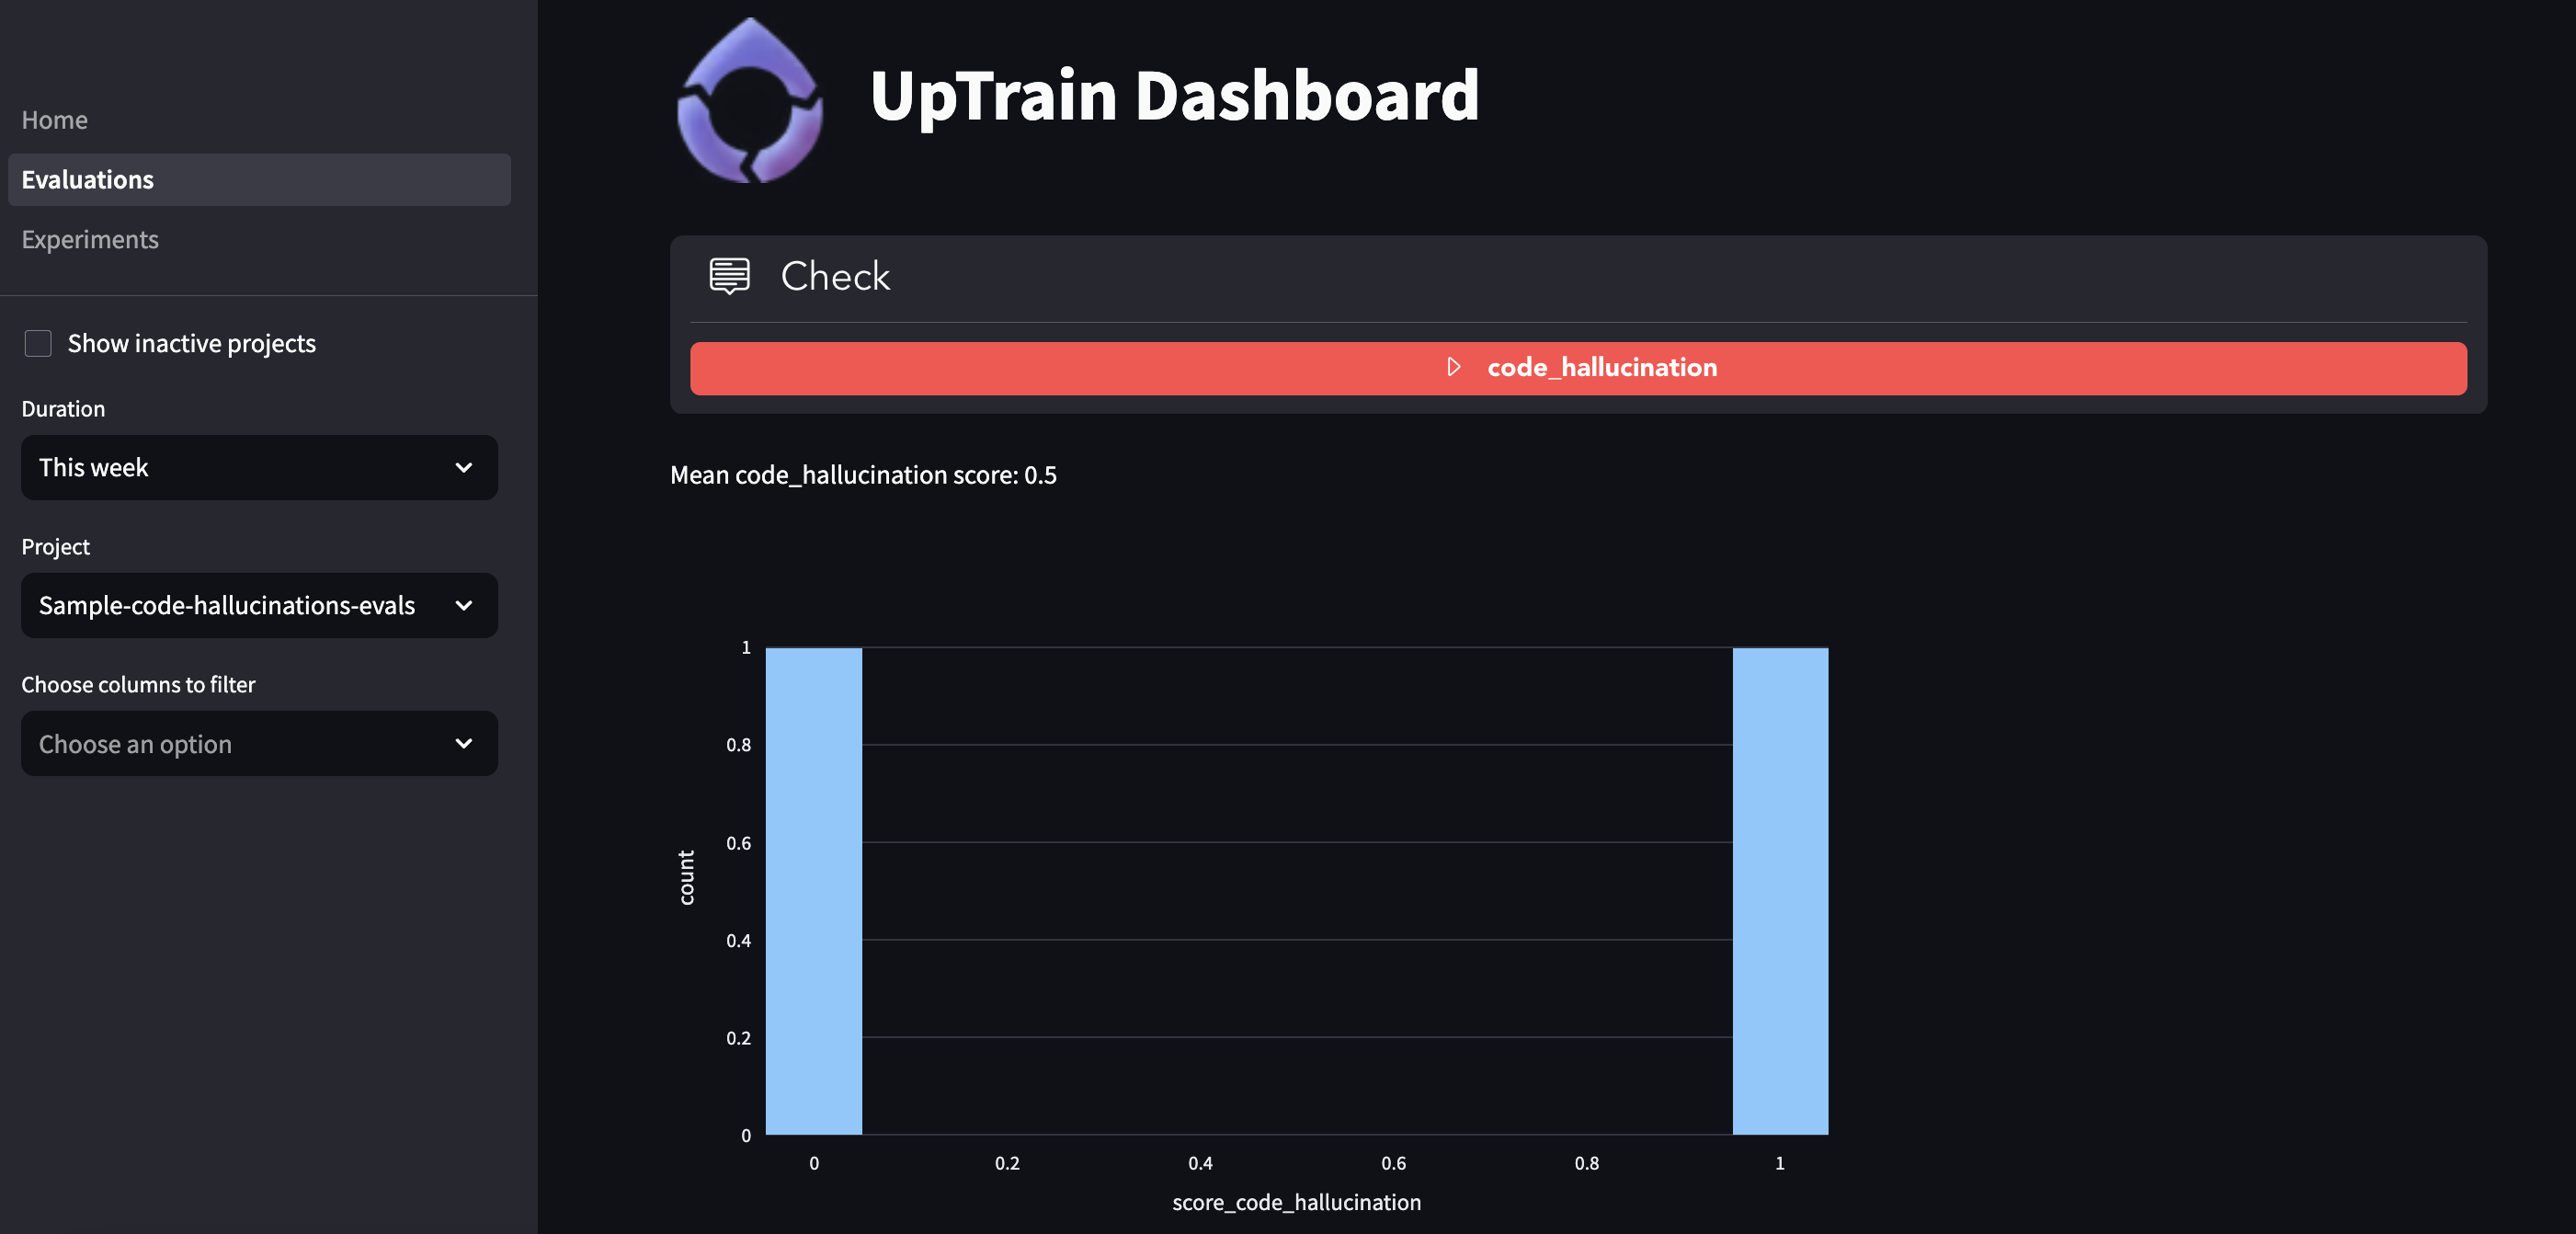

### Insights:
You can filter failure cases and generate common topics among them. This can help identify the core issue and help fix it

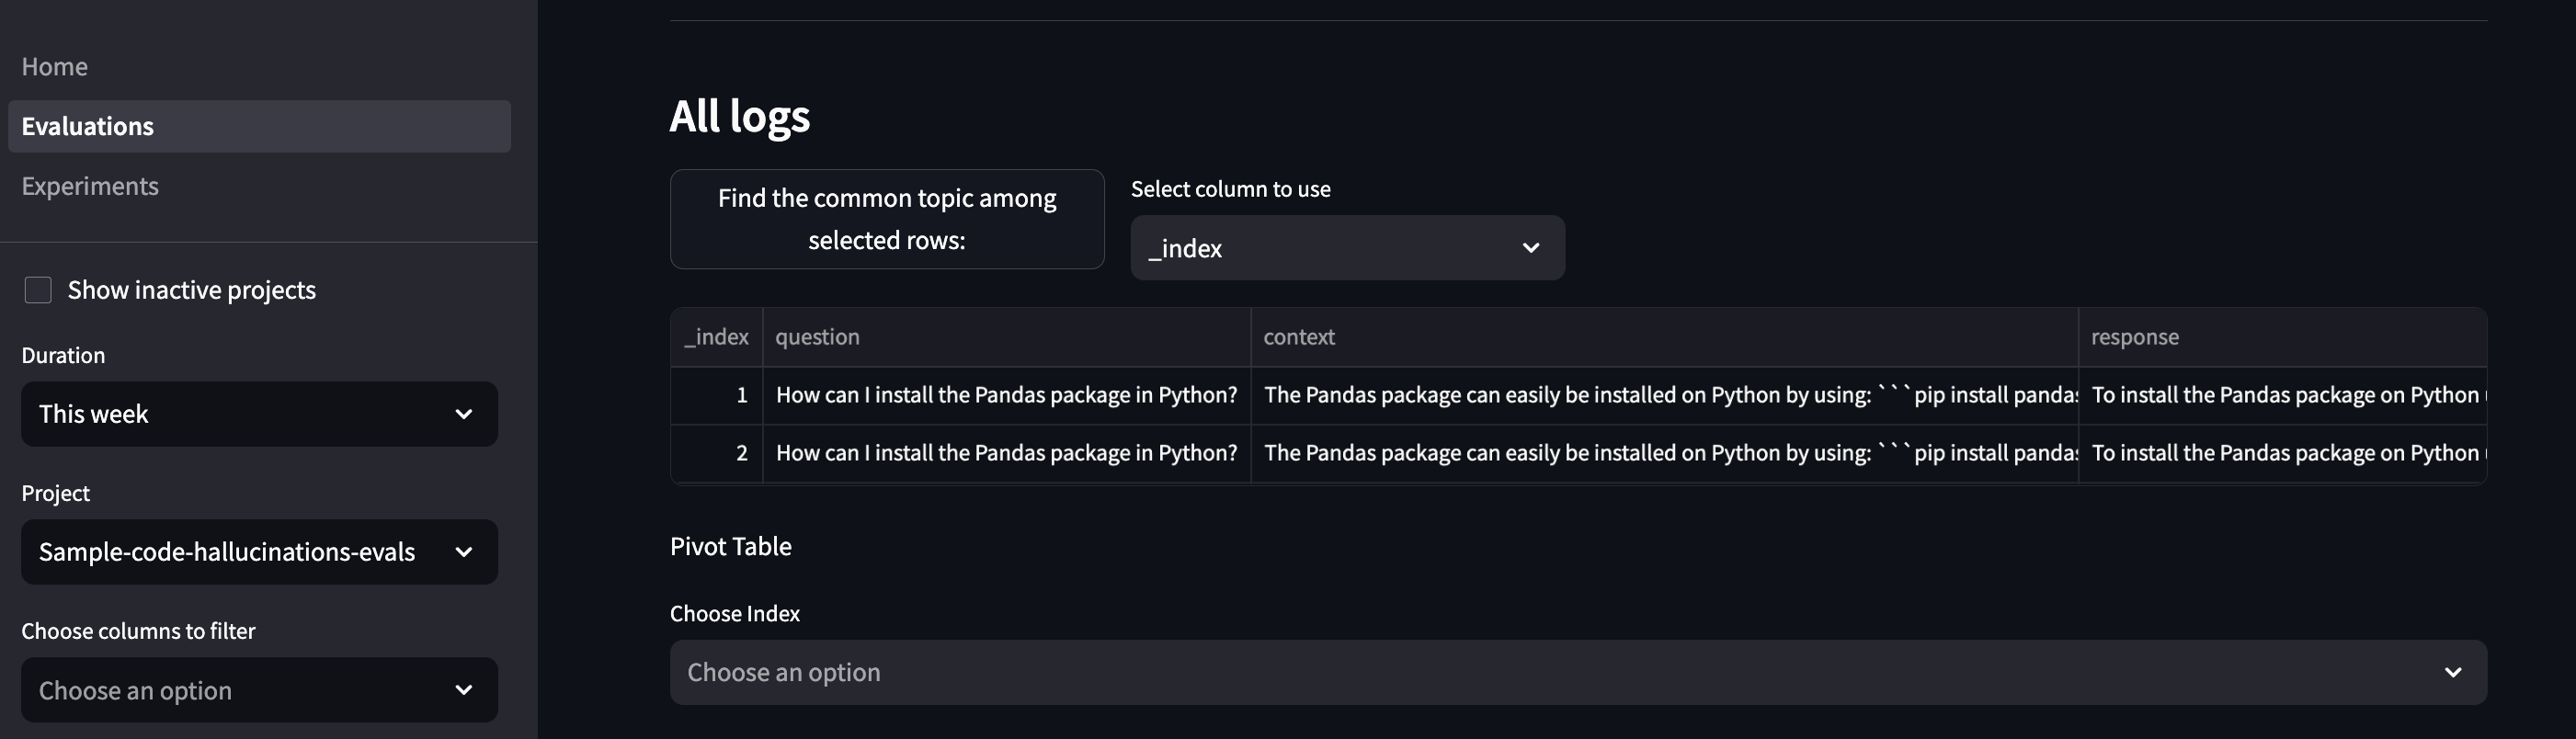